<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/top_homeworks/Evoluci%C3%B3n_Musica_Shakira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*EVOLUCION MUSICAL DE SHAKIRA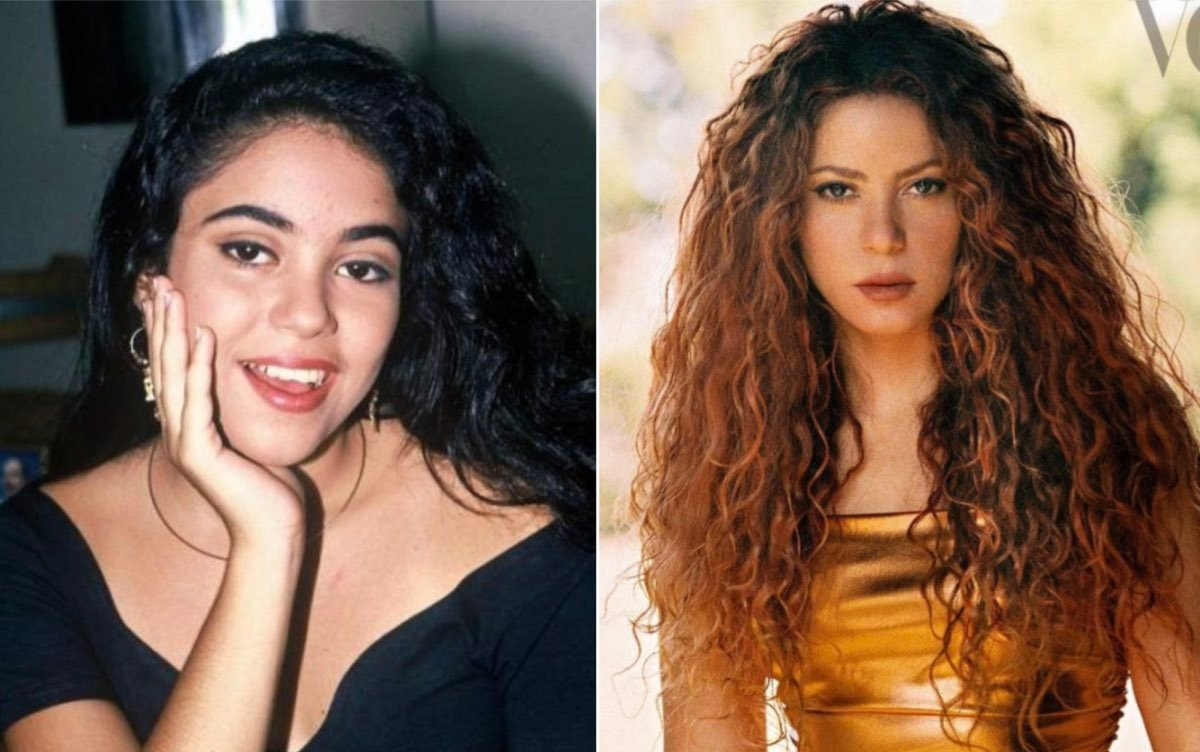*

**María** **Emilia** **Castro** y **Juan** **Diego** **Cevallos**



En este trabajo analizamos la evolución de la música de Shakira, desde su debut hasta la actualidad. Por lo tanto, creamos dos playlists en Spotify para poder comparar los cambios que ha tenido su arte a lo largo del tiempo. 
 
La primera playlist se llama “Shakiantiguo”, la cual contiene 60 canciones de Shakira que pertenecen a los álbumes “Pies descalzos”, “¿Dónde están los ladrones?”, “Servicio de lavandería”, “Fijación oral vol.1” y “Oral fixation vol.2”. Todas estas piezas fueron estrenadas en un período de 10 años; entre 1995-2005.
 
Por otro lado, la segunda playlist se llama “Shakinuevo” y contiene 60 canciones de Shakira de los álbumes “She Wolf”, “Sale el sol”, “Shakira (Expanded Edition) y “El Dorado”. Estas canciones fueron sacadas entre el año 2009 y el año 2022.
 
A pesar de que Shakira es una de las artistas más influyentes del mundo, últimamente se ha visto fuertemente criticada por el cambio de estilo de su música. Por esta razón, decidimos hacer esta comparación para analizar qué componentes de la música de Shakira han cambiado en los últimos 30 años y qué tanto lo han hecho.

In [ ]:

! pip install spotipy

import spotipy
spotify = spotipy.Spotify()
import sys
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import lxml
import json

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


client_id = "388d09b9fdcc4ec09fab29d97385db88"
client_secret = "31fa334c42284cec86056445502f11d8"

mi_username = "juandiegocevallos00"

def get_spotify_credentials():
    
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    sp.trace = True
    return sp


def get_spotify_playlist_data(username, playlist_id):

    track_number_limit = 1000     

   
    sp = get_spotify_credentials()

    results = sp.user_playlist(username, playlist_id, fields="tracks,next")['tracks']
    
    

    tracks = results['items']
    while results['next'] and len(tracks) < track_number_limit:
        results = sp.next(results)
        if results['items'][0] is not None:
            tracks.extend(results['items'])

    ts = []
    track_names = []

    for t in tracks:
        track = t['track']
        track['album'] = track['album']['name']
        track_names.append(t['track']['name'])
        artists = []
        for a in track['artists']:
            artists.append(a['name'])
        track['artists'] = ', '.join(artists)
        ts.append(track)

    uris = []
    dat = pd.DataFrame(ts)

    dat.drop(['available_markets', 'disc_number', 'external_ids', 'external_urls'], axis=1, inplace=True)

    features = []

    for i in range(len(dat)// 100 + 1):
        fs = sp.audio_features(dat.uri.iloc[i*100:min((i+1)*100, len(dat))])
        if fs[0] is not None:
            features.extend(fs)

    fs = pd.DataFrame(features)

    dat = pd.concat([dat, fs], axis=1)
    dat['track_name'] = track_names


    dat.set_index('track_name', inplace=True)
    dat = dat[~dat.index.duplicated(keep='first')]
    dat = dat.T[~dat.T.index.duplicated(keep='first')].T

    return dat





     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 138 kB 43.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
miplaylist = get_spotify_playlist_data(username=mi_username, playlist_id="1YR8XVc1nJmqwtOyuoa4DA")
miplaylist['duration_ms'] = miplaylist['duration_ms'].astype(float)
miplaylist['popularity'] = miplaylist['popularity'].astype(float)
miplaylist['danceability'] = miplaylist['danceability'].astype(float)
miplaylist['energy'] = miplaylist['energy'].astype(float)
miplaylist['loudness'] = miplaylist['loudness'].astype(float)
miplaylist['mode'] = miplaylist['mode'].astype(float)
miplaylist['speechiness'] = miplaylist['speechiness'].astype(float)
miplaylist['acousticness'] = miplaylist['acousticness'].astype(float)
miplaylist['instrumentalness'] = miplaylist['instrumentalness'].astype(float)
miplaylist['valence'] = miplaylist['valence'].astype(float)
miplaylist['tempo'] = miplaylist['tempo'].astype(float)
miplaylist['liveness'] = miplaylist['liveness'].astype(float)

In [ ]:
miplaylist

In [ ]:
columnas = ['valence','danceability','energy','duration_ms','tempo', 'popularity', 'speechiness', 'instrumentalness', 'acousticness', ]

miplaylist_mean_series = miplaylist[columnas].mean()
miplaylist_mean_series

mean_dataframe = miplaylist_mean_series.to_frame()

mean_dataframe = mean_dataframe.transpose()
mean_dataframe['playlist'] = "ShakiAntiguo"

mean_dataframe

,valence,danceability,energy,duration_ms,tempo,popularity,speechiness,instrumentalness,acousticness,playlist
0,0.570583,0.691367,0.635602,224009.183333,122.6413,56.466667,0.042367,0.006216,0.253069,ShakiAntiguo


In [ ]:
otroplaylist = get_spotify_playlist_data(username=mi_username, playlist_id="747BQ09SnxTsahNAJ1QC8I")

columnas_tipos = {
  'duration_ms':float,
  'popularity':float,
  'danceability':float,
  'energy':float,
  'loudness':float,
  'mode':float,
  'speechiness':float,
  'acousticness':float,
  'instrumentalness':float,
  'valence':float,
  'tempo':float,
  'liveness':float

  
}

otroplaylist = otroplaylist.astype(columnas_tipos)

In [ ]:
mean_otroplaylist_dataframe = otroplaylist[columnas].mean().to_frame().transpose()

mean_otroplaylist_dataframe['playlist'] = "ShakiNuevo"

mean_otroplaylist_dataframe

,valence,danceability,energy,duration_ms,tempo,popularity,speechiness,instrumentalness,acousticness,playlist
0,0.645217,0.7462,0.740617,199865.766667,127.4172,52.216667,0.083928,0.003839,0.272331,ShakiNuevo


In [ ]:
all_means = pd.concat([mean_dataframe,mean_otroplaylist_dataframe])
all_means

all_means.set_index('playlist')

,valence,danceability,energy,duration_ms,tempo,popularity,speechiness,instrumentalness,acousticness
playlist,,,,,,,,,
ShakiAntiguo,0.570583,0.691367,0.635602,224009.183333,122.6413,56.466667,0.042367,0.006216,0.253069
ShakiNuevo,0.645217,0.746200,0.740617,199865.766667,127.4172,52.216667,0.083928,0.003839,0.272331


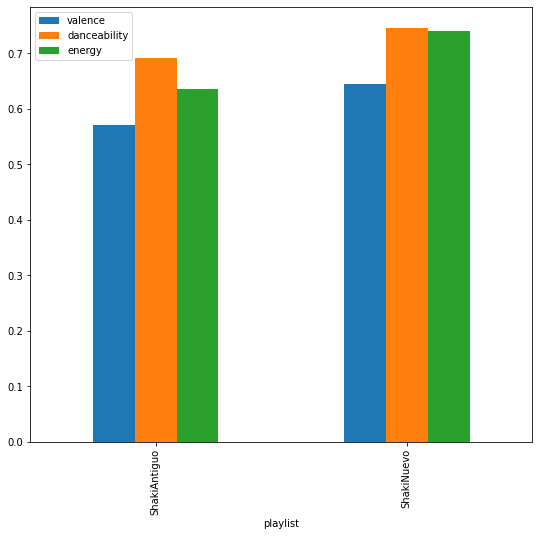

In [ ]:
all_means.plot(x="playlist", y=columnas[0:3], kind="bar",figsize=(9,8))
plt.show()

En este gráfico decidimos agrupar las variables de “valence”, “danceability” y “energy”, las cuales las definen la positividad musical, la lo bailable y la intensidad de una canción. 
 
Estos componentes suelen destacar en la música urbana y sus variantes, pero sobre todo en el reggeaton. Shakira ha sido criticada por supuestamente abandonar sus “raíces” y adentrarse en este género musical. 

No obstante, podemos ver en el gráfico que lo bailabe y la valencia de sus canciones, no han cambiado considerablemente si comparamos ambas playlists. Lo único a destacar, es la mayor energía que tienen sus canciones desde 2009 hasta la fecha.

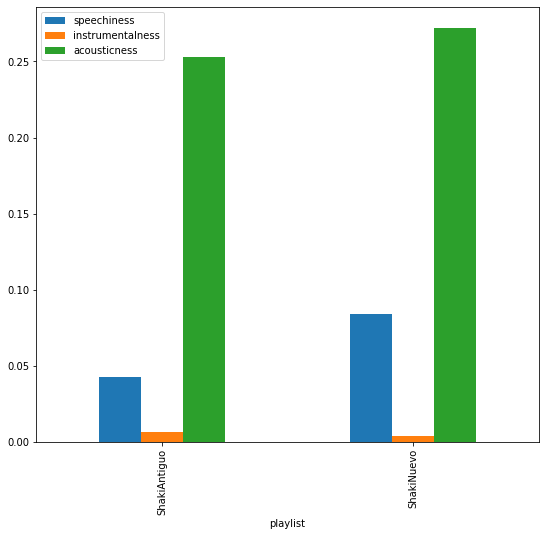

In [ ]:
all_means.plot(x="playlist", y=columnas[6:], kind="bar",figsize=(9,8))
plt.show()

Por otro lado, optamos por juntar las variables de “speechiness”, “instrumentalness” y “acousticness”, las cuales determinan la cantidad de palabras, el contenido vocal y la acústica de las canciones.
 
Se supone que estas variables son mayores dentro de música lenta, baladas o pop. Entonces se suele pensar que probablemente, estas variables no estarían tan presentes en la música de Shakira de los últimos años. 

Sin embargo, podemos notar las canciones de Shakira en la última década, son más instrumentales y acústicas que las de sus principios. Solamente la instrumentalidad fue mayor en sus primeros álbumes, la cual no ha cambiado tanto en el transcurso de los tiempos.

In [ ]:
miplaylist['duration_min']=miplaylist['duration_ms']/1000/60
otroplaylist['duration_min']=otroplaylist['duration_ms']/1000/60

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


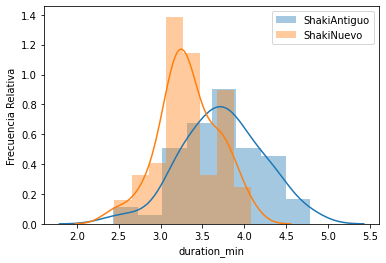

In [ ]:
sns.distplot(miplaylist['duration_min'],  kde=True, label='ShakiAntiguo')
sns.distplot(otroplaylist['duration_min'], kde=True, label='ShakiNuevo')

plt.ylabel("Frecuencia Relativa")
plt.legend()

plt.show()

La duración de las canciones de la artista también han variado. Es interesante ver cómo las canciones antiguas tenían un rango de duración de tiempo más extenso, es decir, las canciones podían ser cortas (2min) hasta alrededor de 5 min. Por el contrario, las canciones nuevas tienen una menor variabilidad pues la mayor parte se encuentra entre los 3-3.5min. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


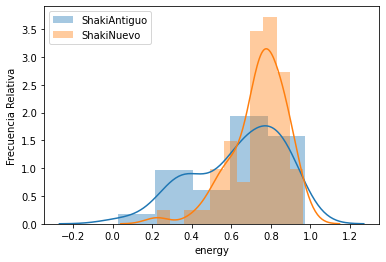

In [ ]:
sns.distplot(miplaylist['energy'],  kde=True, label='ShakiAntiguo')
sns.distplot(otroplaylist['energy'], kde=True, label='ShakiNuevo')

plt.ylabel("Frecuencia Relativa")
plt.legend()

plt.show()

En cuanto a la energía de las canciones, el gráfico muestra que las canciones antiguas tenía una variación mayor, es decir, las canciones eran más variadas en cuanto a más o menos energía. Por otra parte, las canciones nuevas se acumulan en su mayoría en alrededor de 0.8, indicando una energía bastante fuerte.

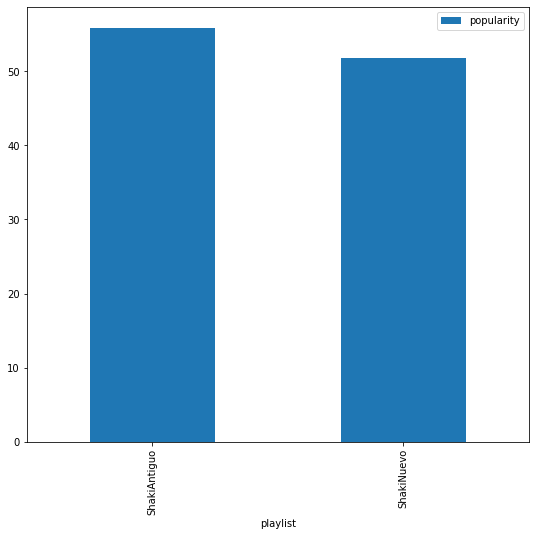

In [ ]:
all_means.plot(x="playlist", y='popularity', kind="bar",figsize=(9,8))
plt.show()

En un principio pensamos que al subir la energía y danzabilidad de las canciones, haciéndolas más comerciales, la popularidad de Shakira subiría considerablemente (considerando además toda su trayectoria). Sin embargo, como se puede ver en el gráfico, la media de popularidad de sus canciones disminuyó en poco más de cuatro puntos. En general, el estilo de Shakira en el tiempo se ha vuelto más consistente, siendo que sus canciones son mucho más parecidas entre sí, comparadas con sus canciones antiguas que podían ser muy diferentes en cuanto a las variables estudiadas anteriormente.